In [28]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from pylab import figure, cm

In [29]:
sizeX = 9
sizeY = 6

def plotFunction(f,fileName,tp = [0,0],dist=1,limit=5,samples=200):
    x1, x2 = np.meshgrid(np.arange(-limit,limit,0.1),np.arange(-limit,limit,0.1))
    y = f(x1,x2)
    fig = plt.figure(figsize=(sizeX,sizeY))
    #plt.imshow(y,extent=[-limit,limit,-limit,limit],cmap=cm.viridis,origin="lower")#,vmax=300)
    plt.contourf(y,extent=[-limit,limit,-limit,limit],cmap=cm.viridis,origin="lower")
    #plt.contourf(y,extent=[-5,5,-5,5],cmap=cm.viridis,origin="lower")#,levels=25,vmax=300)
    plt.colorbar()
    #plt.axis('off')
    l = []
    l.append(tp)
    for i in range(samples):
        x = tp[0]+np.random.rand()*2*dist-dist
        y = tp[1]+np.random.rand()*2*dist-dist
        plt.axvline(x=l[i][0],c="w",alpha=0.2)
        plt.axhline(y=l[i][1],c="w",alpha=0.2)
        l.append([x,y])
    for i in range(samples):
        plt.plot(l[i][0],l[i][1],'ro',alpha=0.5)
    plt.xlabel("$x_1$",fontdict={'family':'sans','color':'black','size':20})
    plt.ylabel("$x_2$",fontdict={'family':'sans','color':'black','size':20})
    plt.ylim(-limit,limit)
    plt.xlim(-limit,limit)
    plt.savefig(fileName+".png",bbox_inches='tight')
    plt.show()
    return np.array(l)
def plotSlices(f,numOfSlices,fileName,alpha=0.1,fp=None,limit=5):
    fig = plt.figure(figsize=(sizeX,sizeY))
    l = [[f(x1,x2) for x1 in np.arange(-limit,limit,0.1)] for x2 in fp[:,1]]
    plt.plot(np.arange(-limit,limit,0.1),l[0],c="blue",alpha=1.0)
    for i in range(1,len(fp)):
        plt.plot(np.arange(-limit,limit,0.1),l[i],c="grey",alpha=alpha)
    plt.plot(fp[0][0],f(fp[0][0],fp[0][1]),'bo',markersize=12,label=str("Minimizer"))
    #plt.axis('off')
    plt.xlabel("$x_1$",fontdict={'family':'sans','color':'black','size':20})
    plt.ylabel("$f(x_1,x_2)$",fontdict={'family':'sans','color':'black','size':20})
    plt.legend(loc='upper right',prop={'size':12})
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.grid()
    plt.xlim(-limit,limit)
    # plt.savefig(fileName+"x1.png",bbox_inches='tight')
    plt.show()
    
    fig = plt.figure(figsize=(sizeX,sizeY))
    l = [[f(x1,x2) for x2 in np.arange(-limit,limit,0.1)] for x1 in fp[:,0]]
    plt.plot(np.arange(-limit,limit,0.1),l[0],c="blue",alpha=1.0)
    for i in range(1,len(fp)):
        plt.plot(np.arange(-limit,limit,0.1),l[i],c="grey",alpha=alpha)
    plt.plot(fp[0][1],f(fp[0][0],fp[0][1]),'bo',markersize=12,label=str("Center vector"))
    #plt.axis('off')
    plt.xlabel("$x_2$",fontdict={'family':'sans','color':'black','size':20})
    plt.ylabel("$f(x_1,x_2)$",fontdict={'family':'sans','color':'black','size':20})
    plt.legend(loc='upper right',prop={'size':12})
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.grid()
    plt.xlim(-limit,limit)
    plt.savefig(fileName+"x2.png",bbox_inches='tight')
    plt.show()

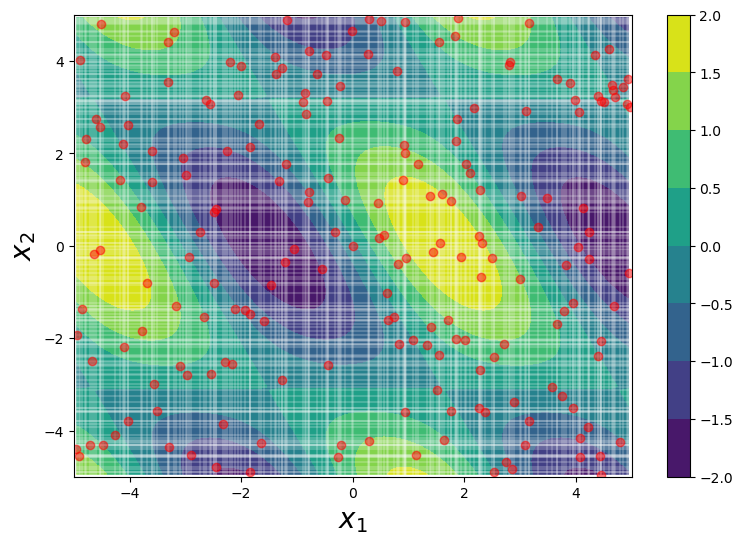

In [30]:
def rastrigin3(x1,x2,x3):
    A = 10
    n = 3
    res = A*n+(x1**2-A*np.cos(2*np.pi*x1))+(x2**2-A*np.cos(2*np.pi*x2))+(x3**2-A*np.cos(2*np.pi*x3))
    return res

def rastrigin(x1,x2):
    A = 10
    n = 2
    res = A*n+(x1**2-A*np.cos(2*np.pi*x1))+(x2**2-A*np.cos(2*np.pi*x2))
    return res
    
def himmelblau(x,y):
    return (x**2+y-11)**2+(x+y**2-7)**2

def sphere(x,y):
    return x**2+y**2

def ackley(x, y):
    return -20.0 * np.exp(-0.2 * np.sqrt(0.5 * (x**2 + y**2))) - np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))) + np.e + 20

def sinsin(x,y):
    return np.sin(x)+np.sin(x+y)

f = sinsin
l = plotFunction(f,"fglobal",tp=[0,0],dist=5,limit=5)
# plotSlices(f,len(l),"fglobal",alpha=0.1,fp=l,limit=5)
# l = plotFunction(f,"flocal",tp=[-np.pi/2,0],dist=1,limit=5)
# plotSlices(f,len(l),"flocal",alpha=0.1,fp=l,limit=5)